In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df_movies = pd.read_csv('./app/datasets/movies_imdb.csv')
df_movies = df_movies.dropna(subset=['plots', 'genres', 'directors', 'rating', 'runtimes', 'title', 'year'])
df_movies = df_movies.loc[:, ['genres']]
df_movies['movieId'] = df_movies.index
df_movies.head()

,genres,movieId
0,Animation|Adventure|Comedy|Family|Fantasy,0
1,Adventure|Comedy|Family|Fantasy,1
2,Comedy|Romance,2
3,Comedy|Drama|Romance,3
4,Comedy|Family|Romance,4


In [29]:
df_ratings = pd.read_csv('./app/datasets/ml-20m/ratings.csv')
#df_ratings = df_ratings[df_ratings['movieId'] in df_movies.index.values]
counts = df_ratings['userId'].value_counts() 
users = counts[counts == 100].index.values
df_ratings.shape
mean = df_ratings[df_ratings.movieId==131254].rating.mean()
std = df_ratings[df_ratings.movieId==131254].rating.std() 
if np.isnan(std):
    std = 0.0
f2 = (1/ (mean*((std+1)**2))) 
users


NameError: name 'json' is not defined

In [4]:
import json
with open('./app/datasets/index.txt') as json_file:
    data = json.load(json_file)
    print(list(data.keys()))

['4169', '1680', '4277', '1941', '1181', '889', '3618', '2063', '1150', '1015', '5795', '4344', '1980', '2909', '1449', '4510', '424', '4227', '5831', '3391', '3841', '4508', '1088', '5367', '3808', '549', '1285', '3224', '3539', '4543', '5643', '1448', '752', '3032', '3824', '524', '4448', '4064', '4725', '1010', '5954', '678', '1447', '4447', '2116', '550', '1605', '3526', '1880', '1698', '1912', '3778', '4808', '3292', '4425', '1019', '3507', '3311', '881', '2181', '6016', '2015', '2106', '4647', '5812', '2820', '6036', '710', '4312', '1647', '4979', '2777', '4386', '5026', '2304', '352', '531', '5046', '1676', '1051', '3163', '3626', '2507', '1958', '5100', '5394', '3675', '2907', '5636', '4041', '869', '5333', '1733', '5614', '3401', '3272', '4085', '3067', '2665', '5788', '482', '5256', '3471', '3829', '1383', '195', '4238', '3792', '5627', '2529', '1340', '5111', '1317', '1613', '2857', '216', '3705', '1635', '2793', '302', '3650', '4682', '1837', '4482', '1425', '1737', '839', 

In [15]:
itens = pd.pivot_table(df_ratings_wt[df_ratings['movieId'].isin(df_ratings_user['movieId'])], values='rating', index='movieId', columns='userId').fillna(0)
itens

NameError: name 'df_ratings_wt' is not defined

In [44]:

df_movies = None

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
sim = pd.DataFrame(cosine_similarity(itens, itens), index=itens.index, columns=itens.index) 
itens = None
sim

movieId,19,32,44,70,158,256,260,333,344,410,...,5618,5900,5952,6383,6502,6807,7153,7438,8810,27075
movieId,,,,,,,,,,,,,,,,,,,,,
19,1.000000,0.312883,0.419609,0.114879,0.412444,0.358291,0.125619,0.412122,0.626743,0.495052,...,0.051988,0.047289,0.096279,0.058793,0.061938,0.049800,0.101053,0.060746,0.023357,0.055048
32,0.312883,1.000000,0.297440,0.212351,0.265410,0.234726,0.404816,0.261225,0.400867,0.334325,...,0.130020,0.044064,0.211574,0.045597,0.182092,0.068131,0.230642,0.218024,0.079165,0.086669
44,0.419609,0.297440,1.000000,0.188986,0.413575,0.417469,0.099370,0.351100,0.452641,0.553250,...,0.065913,0.013413,0.034645,0.054476,0.034339,0.013310,0.056082,0.044386,0.071012,0.021253
70,0.114879,0.212351,0.188986,1.000000,0.078333,0.107031,0.145630,0.119930,0.199382,0.193697,...,0.028302,0.030950,0.061739,0.015712,0.041186,0.067114,0.061890,0.044944,0.023408,0.049039
158,0.412444,0.265410,0.413575,0.078333,1.000000,0.393597,0.095288,0.299919,0.452806,0.475269,...,0.044344,0.067011,0.084002,0.087333,0.040156,0.015880,0.060818,0.034646,0.012103,0.076065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,0.049800,0.068131,0.013310,0.067114,0.015880,0.044342,0.073028,0.015629,0.048349,0.034559,...,0.079109,0.065881,0.185858,0.033445,0.080154,1.000000,0.158435,0.132194,0.049826,0.104383
7153,0.101053,0.230642,0.056082,0.061890,0.060818,0.023161,0.435554,0.077172,0.160906,0.034908,...,0.366203,0.020366,0.823398,0.169256,0.207519,0.158435,1.000000,0.444149,0.153459,0.103977
7438,0.060746,0.218024,0.044386,0.044944,0.034646,0.012449,0.230811,0.026198,0.119207,0.041955,...,0.325628,0.087642,0.412552,0.045679,0.196199,0.132194,0.444149,1.000000,0.193550,0.049991


In [7]:
df_movies_user = df_ratings[df_ratings['userId'] == df_ratings['userId'].values[0]]
df_movies_user =  df_movies_user.set_index('movieId')
train, test = train_test_split(df_movies_user)
movies_user_train = train.index
movies_user_test = test.index
df_ratings_wt = df_ratings[~df_ratings.index.isin(test.index)] 
df_movies_user

,userId,rating,timestamp
movieId,,,
19,77,2.0,1341391767
32,77,3.5,1341391442
44,77,1.5,1341391251
70,77,3.0,1341391234
158,77,2.0,1341391226
...,...,...,...
6807,77,4.5,1341428583
7153,77,4.5,1341428909
7438,77,4.5,1341428850


In [8]:
i = 1
b_u = df_movies_user.rating.std()
b_i = df_ratings_wt[['movieId', 'rating']].groupby(['movieId']).std().fillna(0)
beta = df_ratings.rating.std()
b_ui = beta + b_u + b_i
b_ui

,rating
movieId,
1,2.973787
2,3.035638
3,3.153257
4,3.143225
5,3.138576
...,...
27075,3.257092
27156,2.102392
27251,2.455945


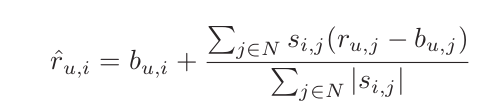

In [9]:
item_item_u = sim.loc[movies_user_test, movies_user_train]

In [10]:
item_item_u

movieId,2010,1064,1732,6383,2329,2572,3070,1278,260,3000,...,1196,410,3504,2871,1371,1233,256,3175,2161,2313
movieId,,,,,,,,,,,,,,,,,,,,,
5291,0.256565,0.111618,0.129212,0.073293,0.082165,0.049333,0.146031,0.068105,0.060746,0.171832,...,0.075659,0.084540,0.127108,0.097599,0.136793,0.074134,0.030157,0.061288,0.118401,0.093439
333,0.015636,0.012177,0.079839,0.041312,0.082149,0.068889,0.015931,0.049687,0.099132,0.027925,...,0.065115,0.404655,0.013867,0.028900,0.014923,0.008088,0.318027,0.067976,0.045209,0.010194
2529,0.273799,0.081797,0.062729,0.086075,0.067358,0.030591,0.112332,0.085182,0.249609,0.166088,...,0.295589,0.025131,0.087575,0.076632,0.227053,0.134513,0.045333,0.221688,0.118657,0.090296
1372,0.128762,0.082729,0.097271,0.065847,0.080006,0.039889,0.124021,0.134442,0.214677,0.075457,...,0.221973,0.061414,0.042823,0.051671,0.454460,0.049952,0.044026,0.187552,0.099724,0.031480
1225,0.102296,0.042922,0.149650,0.035231,0.109948,0.037942,0.099975,0.168336,0.273179,0.140053,...,0.300590,0.082083,0.214155,0.065802,0.053135,0.230213,0.035361,0.049100,0.171604,0.285530
344,0.030156,0.116774,0.115634,0.067334,0.132672,0.110809,0.016884,0.119231,0.197797,0.048792,...,0.170303,0.567794,0.041308,0.023266,0.056424,0.030058,0.405398,0.066455,0.011100,0.018770
1214,0.132777,0.097277,0.205975,0.085503,0.216289,0.056536,0.101882,0.213233,0.461920,0.246467,...,0.455598,0.066218,0.136654,0.225326,0.194003,0.207469,0.031904,0.171035,0.163405,0.170837
3928,0.078730,0.183942,0.039650,0.040261,0.029723,0.027100,0.080218,0.165234,0.051780,0.052729,...,0.089280,0.026122,0.069823,0.053613,0.075144,0.040724,0.016566,0.071074,0.065040,0.051328
1208,0.121580,0.026798,0.246655,0.063347,0.266883,0.066090,0.198671,0.142866,0.277179,0.136479,...,0.266211,0.058416,0.161059,0.225280,0.202525,0.275208,0.024134,0.085587,0.096649,0.192284


In [11]:
s_ij = item_item_u.iloc[0, :].sort_values(ascending=False)[:10]

In [12]:
s_ij

movieId
2010     0.256565
27075    0.228748
3030     0.212719
2788     0.200984
1281     0.172100
3000     0.171832
1688     0.164283
1348     0.161017
1499     0.155333
1204     0.149069
Name: 5291, dtype: float64

In [13]:
train.loc[s_ij.index,:].rating

movieId
2010     4.5
27075    2.0
3030     4.5
2788     4.0
1281     5.0
3000     4.5
1688     3.5
1348     4.0
1499     2.0
1204     5.0
Name: rating, dtype: float64

In [14]:
b_ui.loc[s_ij.index,:].rating

movieId
2010     2.991689
27075    3.257092
3030     2.834317
2788     3.444768
1281     2.679742
3000     2.919301
1688     3.521952
1348     2.847070
1499     3.197461
1204     2.990652
Name: rating, dtype: float64

In [15]:
train.loc[s_ij.index,:].rating - b_ui.loc[s_ij.index,:].rating

movieId
2010     1.508311
27075   -1.257092
3030     1.665683
2788     0.555232
1281     2.320258
3000     1.580699
1688    -0.021952
1348     1.152930
1499    -1.197461
1204     2.009348
Name: rating, dtype: float64

In [16]:
r_ij = train.loc[s_ij.index,:].rating
b_uj = b_ui.loc[s_ij.index,:].rating
num = s_ij*(r_ij - b_uj)
num

movieId
2010     0.386980
27075   -0.287557
3030     0.354323
2788     0.111593
1281     0.399315
3000     0.271614
1688    -0.003606
1348     0.185641
1499    -0.186005
1204     0.299532
dtype: float64

In [21]:
den = s_ij.abs().sum()


In [31]:
r_ij = b_ui.loc[5291, :].values[0] + (num.sum()/den.sum())

In [36]:
def rij(item_item_u, i, train, b_ui, n):
    s_ij = item_item_u.loc[i, :].sort_values(ascending=False)[:n]
    r_ij = train.loc[s_ij.index,:].rating
    b_uj = b_ui.loc[s_ij.index,:].rating
    num = s_ij*(r_ij - b_uj)
    den = s_ij.abs().sum()
    return b_ui.loc[i, :].values[0] + (num.sum()/den.sum())
    

In [38]:
rij(item_item_u, 5291, train, b_ui, 5)

3.4112466323992665

In [53]:
def get_all_rij(df_ratings, train, test, user, n):
    movies_user_train = train.index
    movies_user_test = test.index
    df_ratings_wt = df_ratings[~df_ratings.index.isin(movies_user_test)] 
    df_ratings_user = df_ratings[df_ratings['userId'] == user]
    itens_rating = pd.pivot_table(df_ratings_wt[df_ratings_wt['movieId'].isin(df_ratings_user['movieId'])], values='rating', index='movieId', columns='userId').fillna(0)
    sim = pd.DataFrame(cosine_similarity(itens_rating, itens_rating), index=itens_rating.index, columns=itens_rating.index)
    item_item_u = sim.loc[movies_user_test, movies_user_train]
    b_u = df_movies_user.rating.std()
    b_i = df_ratings_wt[['movieId', 'rating']].groupby(['movieId']).std().fillna(0)
    beta = df_ratings.rating.std()
    b_ui = beta + b_u + b_i
    rs = pd.DataFrame(np.zeros(movies_user_test.shape[0]), index=movies_user_test, columns=['rating'])
    for i in movies_user_test:
        rs.loc[i, 'rating'] = rij(item_item_u, i, train, b_ui, n)
    return rs

In [54]:
get_all_rij(df_ratings, train, test, 77, 10)

,rating
movieId,
5291,3.328642
333,2.521630
2529,4.257574
1372,4.168005
1225,4.510724
344,2.839100
1214,4.358715
3928,3.092934
1208,4.371679
